<h2 style = "color : Brown"> Case Study - Lending Case Study </h2>

In [46]:
# Import the libraries
from numpy import * # for scientific computing
from pandas import * # for data analysis
from matplotlib.pyplot import * # for data visualization and graphical plotting
from seaborn import *

<h4 style = "color : Black"> EDA Step 1: Data Sourcing </h4>
Read complete loan data for all loans issued through the time period 2007 t0 2011.

In [2]:
# Read the data and print the loan data
df_loan_data = read_csv('loan\loan.csv', encoding = "ISO-8859-1", low_memory=False)

# Display Dataframe
df_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Display Dataframe Info:
df_loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
# Display Dataframe shape:
df_loan_data.shape

(39717, 111)

<h4 style = "color : Black"> EDA Step 2: Data Cleaning </h4>

- Check for the missing values and remove them(if exist).
- Filter out the required information
- Figure out the unneccessary information and remove them.
- Standarizing the values
- Remove Outliers

In [5]:
#Check for the missing values Percentage.
missing_value_percentage = (df_loan_data.isnull().sum()/df_loan_data.shape[0])*100
print(missing_value_percentage)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


From the missing percentage it seems many columns have above 50% of the missing values so, removing them.

In [6]:
# Fetch the list of the columns having more than 50% of the missing values
col_missing_value = df_loan_data.columns[((df_loan_data.isnull().sum()/df_loan_data.shape[0])*100) > 50]
# Print list of the columns
print(col_missing_value)
# Drop the all the missing columns from the dataframe
df_loan_data.drop(col_missing_value, axis = 'columns', inplace = True)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [7]:
# Display Dataframe Info after removing missing values:
df_loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [8]:
# Display Dataframe shape after removing missing values:
df_loan_data.shape

(39717, 54)

In [9]:
# check if we have columns having the single unique value.
len(df_loan_data.columns[df_loan_data.nunique() == 1])

9

**We have total 9 columns having a single unique observations**

In [10]:
# Fetch the list of the columns having single unique value
col_one_unique_value = df_loan_data.columns[df_loan_data.nunique() == 1]
# Print list of the columns
print(col_one_unique_value)
# Drop the all such columns from the dataframe
df_loan_data.drop(col_one_unique_value, axis = 'columns', inplace = True)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [11]:
# Display Dataframe shape after removing Duplicate values:
df_loan_data.shape

(39717, 45)

In [12]:
# Check for the duplicate Rows in the data frome
row_duplicate = df_loan_data[df_loan_data.duplicated(keep = 'first')]
len(row_duplicate)

0

**We don't any duplicate rows in the data frame. So, we are now done with the Data Filtering.**

In [13]:
#Display coloumns
print(df_loan_data.columns)
print("Total nummber of columns: {}.".format(len(df_loan_data.columns)))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')
Total nummber of columns: 45.


From the above list of columns it looks like we have few unnecessary/irrelevant coloumns that can be drop from the data frame.
The list of the irrelevant columns are:
- zip_code:	The first 3 numbers of the zip code provided by the borrower in the loan application.
- url:	URL for the LC page with listing data.
- sub_grad: LC assigned loan subgrade
- earliest_cr_line: The month the borrower's earliest reported credit line was opened
- pub_rec: Number of derogatory public records
- total_acc : The total number of credit lines currently in the borrower's credit file


In [14]:
# dropping the irrelevant column
columns=['dti','id','funded_amnt','member_id','title','pub_rec_bankruptcies','issue_d','emp_title','desc','zip_code','url','addr_state','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
df_loan_data.drop(columns, axis = 1, inplace = True)


In [15]:
print(df_loan_data.columns)
print("Total nummber of columns: {}.".format(len(df_loan_data.columns)))

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose'],
      dtype='object')
Total nummber of columns: 13.


In [16]:
# Renaming the column name
# installment : EMI
# Annual_inc: Annual Income
# term : Term_In_Months

In [17]:
#Renaming the column
df_loan_data.rename(columns = {'annual_inc':'annual_income','installment':'EMI','term':'term_in_months'}, inplace = True)


In [18]:
print(df_loan_data.columns)

Index(['loan_amnt', 'funded_amnt_inv', 'term_in_months', 'int_rate', 'EMI',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_income',
       'verification_status', 'loan_status', 'purpose'],
      dtype='object')


In [19]:
# Display Dataframe
df_loan_data.head()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,EMI,grade,sub_grade,emp_length,home_ownership,annual_income,verification_status,loan_status,purpose
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other


In [20]:
df_loan_data = df_loan_data[df_loan_data.loan_status!='Current']

In [21]:
df_loan_data = df_loan_data.astype({"term_in_months":'string', "int_rate":'string'}) 
df_loan_data.term_in_months = df_loan_data.term_in_months.apply(lambda term: term.strip('months')).astype(int)
df_loan_data.int_rate = df_loan_data.int_rate.apply(lambda rate: rate.strip('%')).astype(float)

In [22]:
# Display Dataframe
df_loan_data.head()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,EMI,grade,sub_grade,emp_length,home_ownership,annual_income,verification_status,loan_status,purpose
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding


In [23]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term_in_months       38577 non-null  int32  
 3   int_rate             38577 non-null  float64
 4   EMI                  38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_income        38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  purpose              38577 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 4.0+ MB


In [24]:
# Converting the following columns to numeric 
df_loan_data.funded_amnt_inv = df_loan_data.funded_amnt_inv.apply(to_numeric)
df_loan_data.int_rate = df_loan_data.int_rate.apply(to_numeric)
df_loan_data.EMI = df_loan_data.EMI.apply(to_numeric)

**Checking for the outliers and removing them**

In [25]:
def print_quantile_info(column):
    print("Annual Income Quantile Difference:")
    print("- Percentile 75-80  = {}".format(column.quantile(0.8) - column.quantile(0.75)))
    print("- Percentile 80-85  = {}".format(column.quantile(0.85) - column.quantile(0.8)))
    print("- Percentile 85-90  = {}".format(column.quantile(0.9) - column.quantile(0.85)))
    print("- Percentile 90-95  = {}".format(column.quantile(0.95) - column.quantile(.9)))
    print("- Percentile 95-100 = {}".format(column.quantile(1)   - column.quantile(0.95)))

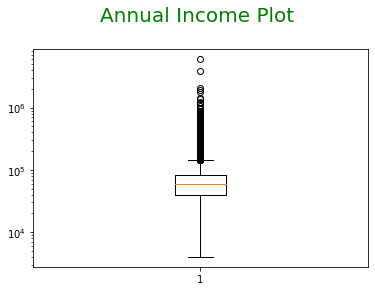

In [26]:
yscale('log')
boxplot([df_loan_data.annual_income])
# Adding and formatting title
title("Annual Income Plot \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
show()

In [27]:
print_quantile_info(df_loan_data.annual_income)

Annual Income Quantile Difference:
- Percentile 75-80  = 8000.0
- Percentile 80-85  = 10000.0
- Percentile 85-90  = 15000.0
- Percentile 90-95  = 25004.0
- Percentile 95-100 = 5859996.0


In [28]:
# From above box plot and quantile data, it is clearly seems we have outlier. And their is increase in the values 
# from 95 percentile. So, we can remove the values above 95 percentile as outliers. 
df_loan_data = df_loan_data[df_loan_data.annual_income <= df_loan_data.annual_income.quantile(0.95)]

In [30]:
print_quantile_info(df_loan_data.annual_income)

Annual Income Quantile Difference:
- Percentile 75-80  = 6029.5
- Percentile 80-85  = 7000.0
- Percentile 85-90  = 9000.0
- Percentile 90-95  = 17000.0
- Percentile 95-100 = 23004.0


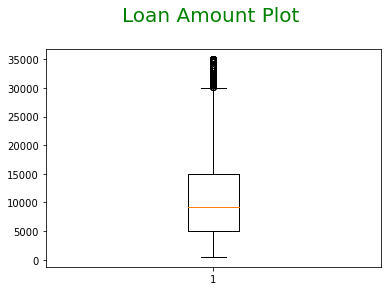

In [31]:
boxplot([df_loan_data.loan_amnt])
# Adding and formatting title
title("Loan Amount Plot \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
show()

In [32]:
print_quantile_info(df_loan_data.loan_amnt)

Annual Income Quantile Difference:
- Percentile 75-80  = 1000.0
- Percentile 80-85  = 2000.0
- Percentile 85-90  = 2000.0
- Percentile 90-95  = 5000.0
- Percentile 95-100 = 10000.0


In [33]:
# From above box plot and quantile data, it is clearly seems we have outlier. And their is increase in the values 
# from 95 percentile. So, we can remove the values above 95 percentile as outliers. 
df_loan_data = df_loan_data[df_loan_data.loan_amnt <= df_loan_data.loan_amnt.quantile(0.95)]

In [34]:
print_quantile_info(df_loan_data.loan_amnt)

Annual Income Quantile Difference:
- Percentile 75-80  = 1000.0
- Percentile 80-85  = 1750.0
- Percentile 85-90  = 3250.0
- Percentile 90-95  = 2750.0
- Percentile 95-100 = 2250.0


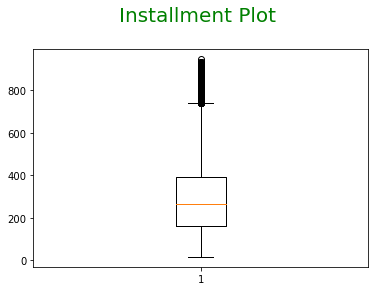

In [35]:
boxplot([df_loan_data.EMI])
# Adding and formatting title
title("Installment Plot \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
show()

In [36]:
print_quantile_info(df_loan_data.EMI)

Annual Income Quantile Difference:
- Percentile 75-80  = 43.244000000000085
- Percentile 80-85  = 51.36999999999989
- Percentile 85-90  = 52.77400000000034
- Percentile 90-95  = 114.46199999999965
- Percentile 95-100 = 290.6700000000001


In [37]:
# From above box plot and quantile data, it is clearly seems we have outlier. And their is increase in the values 
# from 95 percentile. So, we can remove the values above 95 percentile as outliers. 
df_loan_data = df_loan_data[df_loan_data.EMI <= df_loan_data.EMI.quantile(0.95)]

In [38]:
print_quantile_info(df_loan_data.EMI)

Annual Income Quantile Difference:
- Percentile 75-80  = 29.564000000000192
- Percentile 80-85  = 45.303999999999746
- Percentile 85-90  = 46.63200000000006
- Percentile 90-95  = 54.0499999999999
- Percentile 95-100 = 109.04000000000008


In [39]:
df_loan_data.describe()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,EMI,annual_income
count,33769.000000,33769.000000,33769.000000,33769.000000,33769.000000,33769.000000
mean,9375.152507,8715.974316,41.710563,11.681766,272.209137,58642.687097
std,5478.756536,5236.952488,10.219886,3.592572,146.853740,26837.159581
min,500.000000,0.000000,36.000000,5.420000,15.690000,4000.000000
25%,5000.000000,4800.000000,36.000000,8.700000,156.460000,39000.000000
50%,8275.000000,7963.395806,36.000000,11.490000,250.530000,54000.000000
75%,12500.000000,12000.000000,36.000000,14.170000,370.090000,75000.000000
max,25000.000000,25000.000000,60.000000,24.400000,654.680000,140004.000000


In [51]:
df_cleaned_loan_data = df_loan_data
df_cleaned_loan_data.head(10)

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,EMI,grade,sub_grade,emp_length,home_ownership,annual_income,verification_status,loan_status,purpose
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding
6,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation
7,3000,3000.0,36,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Fully Paid,car
8,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business
9,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other
10,6500,6500.0,60,14.65,153.45,C,C3,5 years,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation


# Data Analysis:
## Univariate Analysis

In [89]:
def univ_count_Plot(axis_col, hue_column, x_label, y_label, plot_title, rotation_angle=0):
    figure(figsize = (15, 6))
    countplot(x = axis_col, hue = hue_column, data = df_cleaned_loan_data, palette = "Set2")
    ylabel(y_label, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    xlabel(x_label, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    title(plot_title, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    xticks(rotation = rotation_angle)
    show()
    return

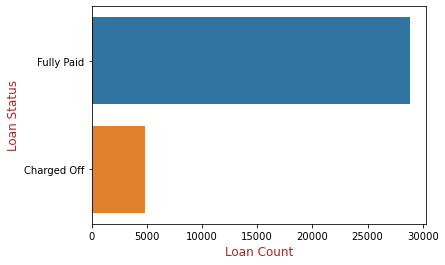

In [90]:
countplot(y ='loan_status', data = df_cleaned_loan_data)
xlabel("Loan Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
show()

**Observation:**
- Total ~5000 loans those are charge off.
- Total >30000 loans those are fully paid.

**Categorical**

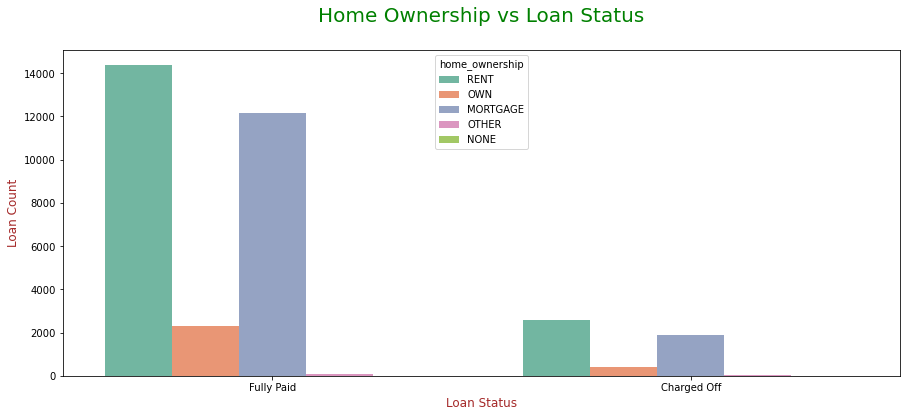

In [91]:
univ_count_Plot('loan_status', 'home_ownership', "Loan Status", "Loan Count", "Home Ownership vs Loan Status\n")

**Observation:**
- Maximum number of loans are charged off for the those who are living on rent.

**Loan Pupose vs Loan Status**

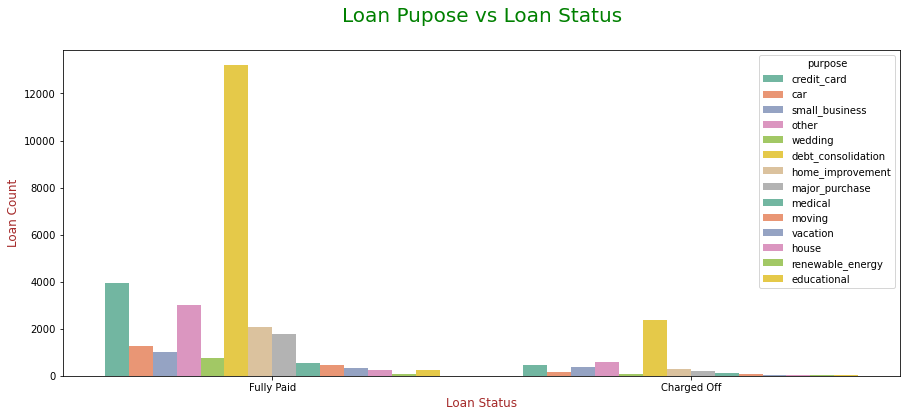

In [92]:
univ_count_Plot('loan_status', 'purpose', "Loan Status", "Loan Count", "Loan Pupose vs Loan Status\n")    

**Observation:**

Maximum number of loans are charged off for the loan taken for debt_consolidation.

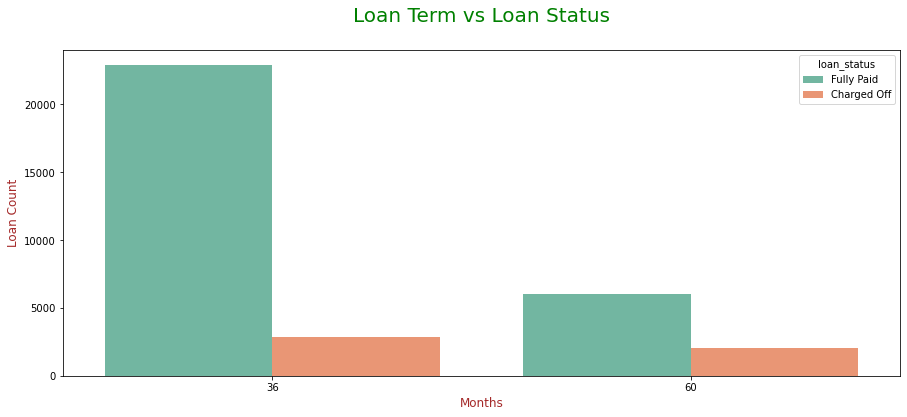

In [95]:
univ_count_Plot('term_in_months' ,'loan_status', "Months", "Loan Count", "Loan Term vs Loan Status\n")

**Observation:**

Maximum number of loans are charged off for the loans applied for 36 months of Loan Term.

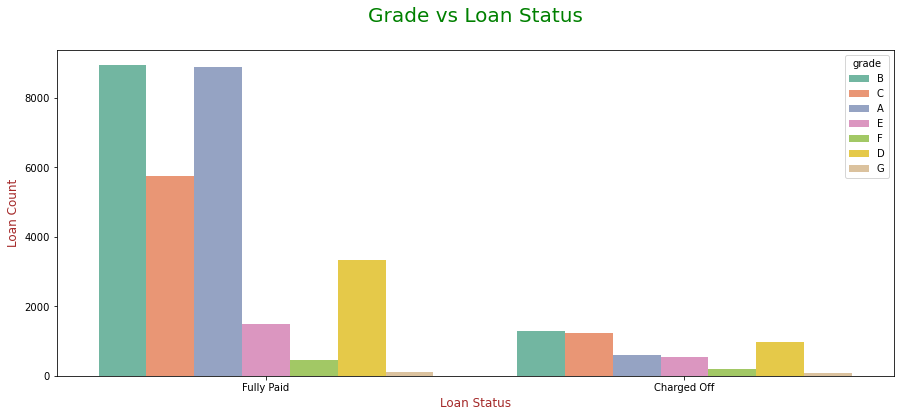

In [99]:
univ_count_Plot('loan_status','grade' , "Loan Status", "Loan Count", "Grade vs Loan Status\n")

**Observation:**

Maximum number of loans are charged off for the loans belong to Grade B and C.

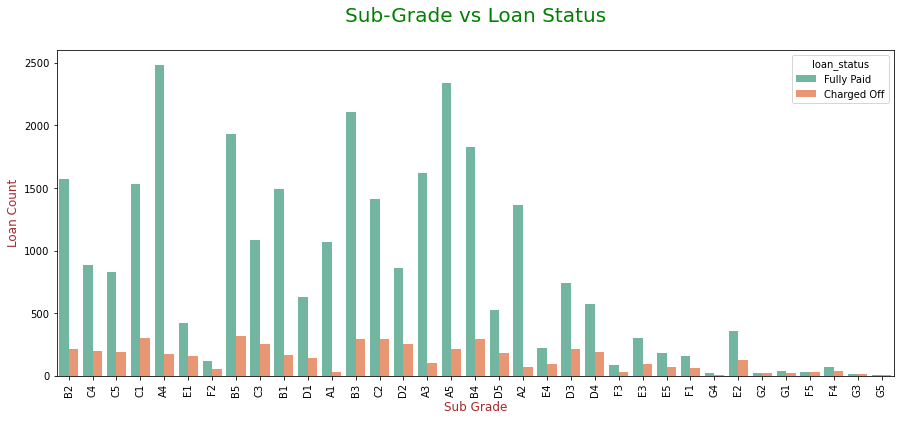

In [105]:
univ_count_Plot('sub_grade', 'loan_status', "Sub Grade", "Loan Count", "Sub-Grade vs Loan Status\n",90)